In [ ]:
from pmdarima import auto_arima



C:\Users\thinh\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(1,1,0)(2,0,2)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\thinh\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\thinh\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\thinh\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\thinh\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\thinh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "C:\U

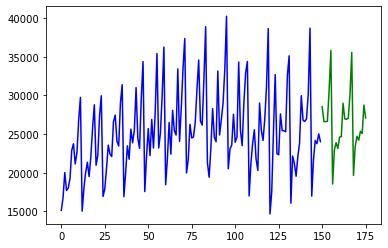

In [2]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load/split your data
y = pm.datasets.load_wineind()
train, test = train_test_split(y, train_size=150)

# Fit your model
model = pm.auto_arima(train, seasonal=True, m=12)

# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x[:150], train, c='blue')
plt.plot(x[150:], forecasts, c='green')
plt.show()

In [13]:
train

array([15136., 16733., 20016., 17708., 18019., 19227., 22893., 23739.,
       21133., 22591., 26786., 29740., 15028., 17977., 20008., 21354.,
       19498., 22125., 25817., 28779., 20960., 22254., 27392., 29945.,
       16933., 17892., 20533., 23569., 22417., 22084., 26580., 27454.,
       24081., 23451., 28991., 31386., 16896., 20045., 23471., 21747.,
       25621., 23859., 25500., 30998., 24475., 23145., 29701., 34365.,
       17556., 22077., 25702., 22214., 26886., 23191., 27831., 35406.,
       23195., 25110., 30009., 36242., 18450., 21845., 26488., 22394.,
       28057., 25451., 24872., 33424., 24052., 28449., 33533., 37351.,
       19969., 21701., 26249., 24493., 24603., 26485., 30723., 34569.,
       26689., 26157., 32064., 38870., 21337., 19419., 23166., 28286.,
       24570., 24001., 33151., 24878., 26804., 28967., 33311., 40226.,
       20504., 23060., 23562., 27562., 23940., 24584., 34303., 25517.,
       23494., 29095., 32903., 34379., 16991., 21109., 23740., 25552.,
      

In [9]:
forecasts

array([28544.45100301, 26622.15106476, 26597.51699521, 26637.87557614,
       30673.00112389, 35811.51055597, 18545.13296834, 22942.78385633,
       23880.70432663, 23120.35097105, 24595.79969739, 24667.97943481,
       28986.79802444, 26960.90126616, 26902.7522947 , 27034.75176813,
       30142.13131759, 35543.79874363, 19639.83323506, 23423.06804023,
       24718.50816965, 24195.1192492 , 25355.56002955, 25062.66361741,
       28740.68215362, 27081.80908772])

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  150
Model:             SARIMAX(2, 1, 1)x(2, 0, [], 12)   Log Likelihood               -1418.496
Date:                             Thu, 08 Jun 2023   AIC                           2848.992
Time:                                     17:02:53   BIC                           2867.016
Sample:                                          0   HQIC                          2856.315
                                             - 150                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0339      0.079     -0.430      0.667      -0.188       0.121
ar.L2         -0.2113      0.094     -2.248      0.025      -0.396      -0.027
ma.L1         -0.8622      0.017    -50.311      0.000      -0.896      -0.829
ar.S.L12       0.5045      0.043     11.845      0.000       0.421       0.588
ar.S.L24       0.3313      0.060      5.505      0.000       0.213       0.449
sigma2      9.567e+06   2.26e-09   4.24e+15      0.000    9.57e+06    9.57e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):               461.40
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                             1.29
Prob(H) (two-sided):                  0.01   Kurtosis:                        11.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.09e+30. Standard errors may be unstable.
"""